In [1]:
# Author: Saeed Zahran
# This script will read & visualize raw data, cropping, filtering, and saving

In [3]:
import numpy as np
import pathlib
import mne

import tempfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

In [4]:
# Load the two raw data files
raw1 = mne.io.read_raw_fif('GS_01_analysis_01-raw.fif', preload=True)
raw2 = mne.io.read_raw_fif('GS_02_analysis_01-raw.fif', preload=True)
raw = mne.io.concatenate_raws([raw1, raw2])

report = mne.Report(title="Raw example")
# This method also accepts a path, e.g., raw=raw_path
report.add_raw(raw=raw, title="Raw", psd=False)  # omit PSD plot
report.save("report_raw.html", overwrite=True)

Opening raw data file GS_01_analysis_01-raw.fif...
    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.
Reading 0 ... 119999  =      0.000 ...   119.999 secs...
Opening raw data file GS_02_analysis_01-raw.fif...
    Range : 0 ... 541999 =      0.000 ...   541.999 secs
Ready.
Reading 0 ... 541999  =      0.000 ...   541.999 secs...
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css
Using matplotlib as 2D backend.
Saving report to : C:\Users\User\Documents\NYU\MEG-EEG-pipeline\report_raw.html


'C:\\Users\\User\\Documents\\NYU\\MEG-EEG-pipeline\\report_raw.html'

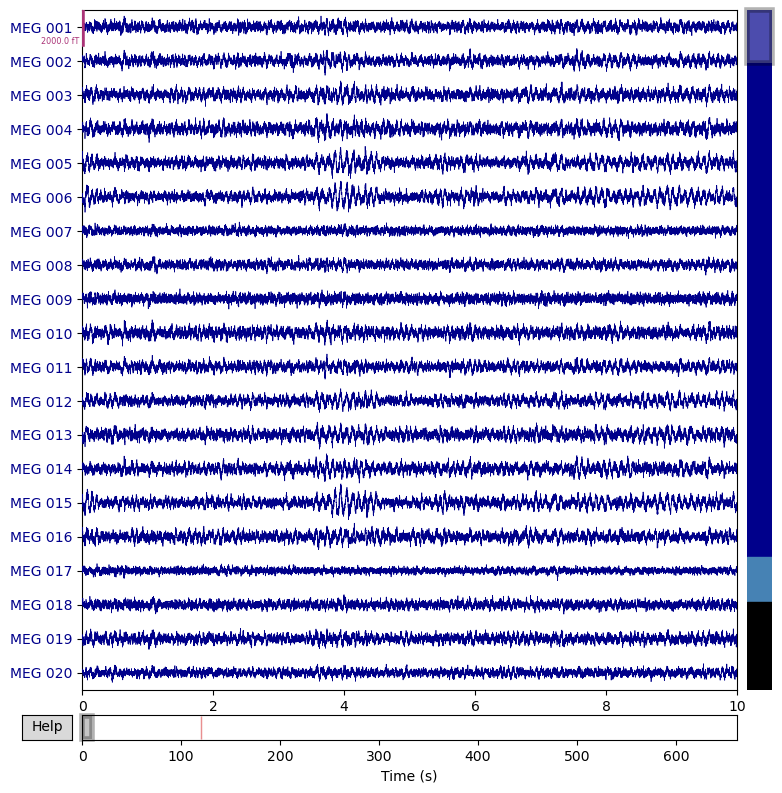

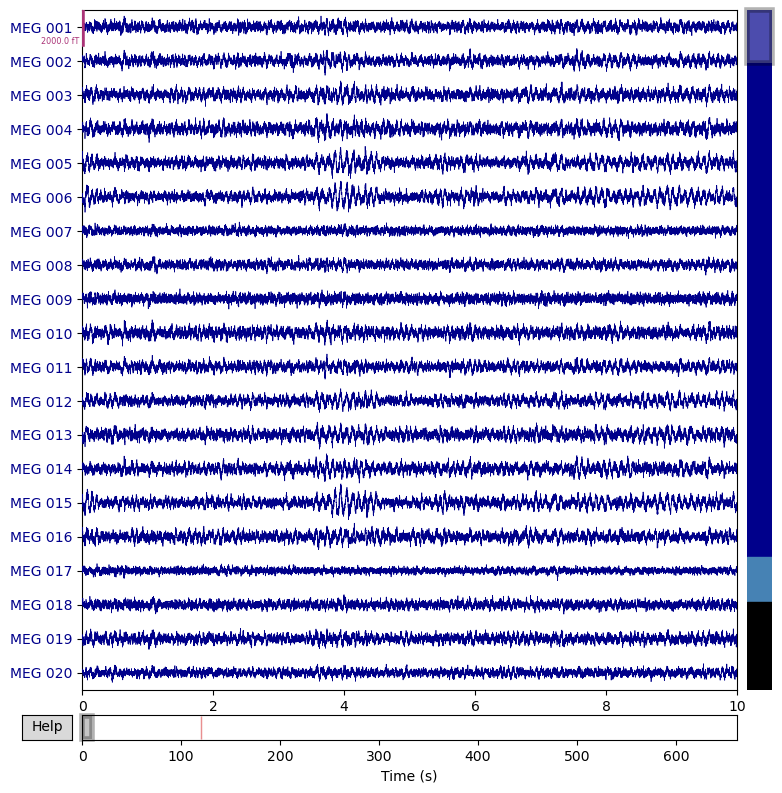

In [5]:
# Let's visualize the raw data!
raw.plot()

2 events found on stim channel STI 014
Event IDs: [1 2]


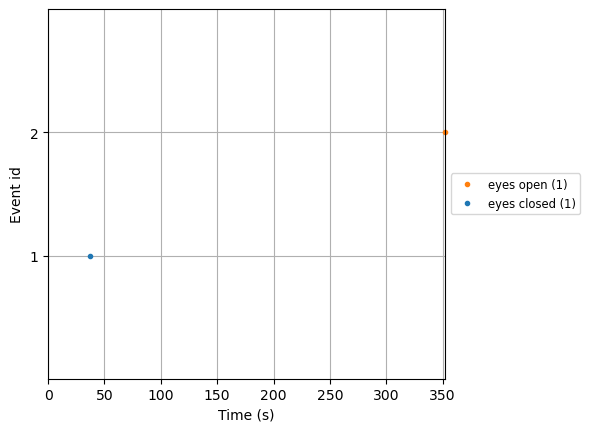

In [6]:
# Extract events from the STIM channels
events = mne.find_events(raw, stim_channel="STI 014")
event_id = {
    "eyes closed": 1,
    "eyes open": 2,
}

fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp, event_id=event_id
)

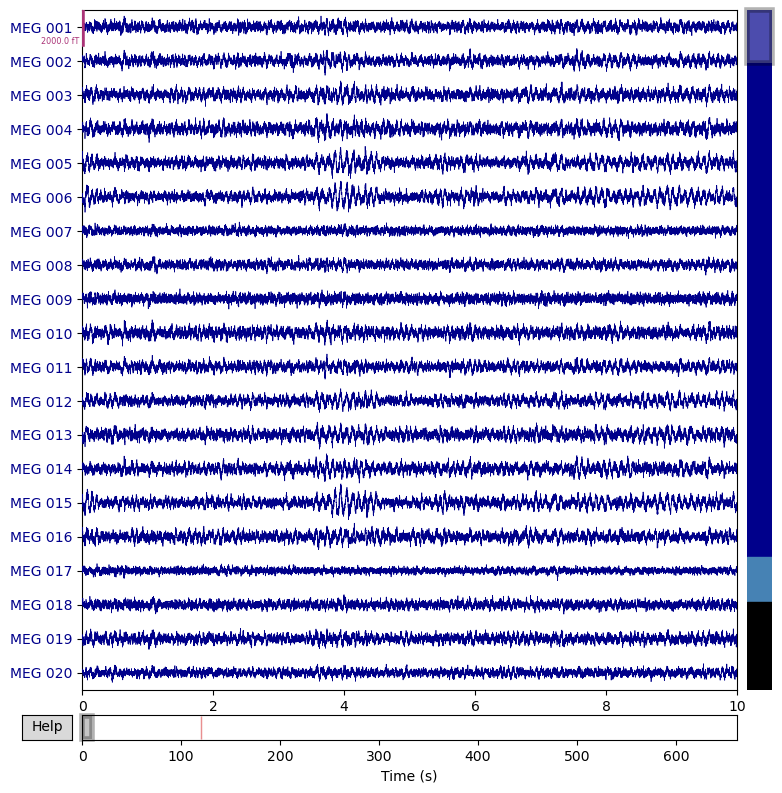

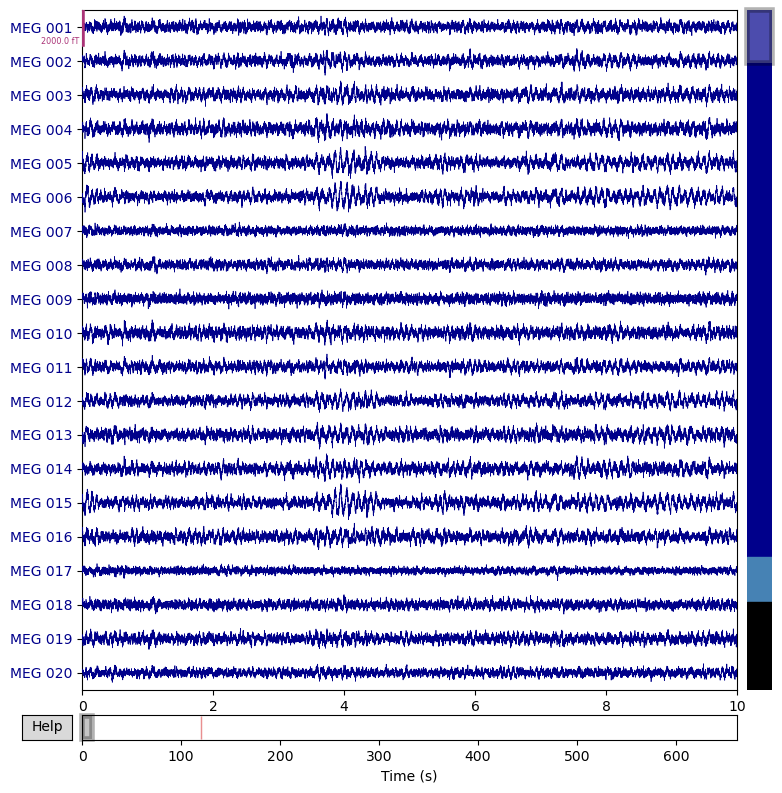

In [7]:
# Plot the raw data again, but add event markers
raw.plot(events=events,event_id=event_id)

In [8]:
# Gather some info about the data
print(raw.info)
print(raw.info['meas_date'])
print(raw.info['sfreq'])
print(raw.info['bads'])
print(raw.ch_names[:10])
print(raw.info['chs'][0])

<Info | 13 non-empty values
 bads: []
 ch_names: MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, MEG 007, ...
 chs: 207 Magnetometers, 17 Reference Magnetometers, 32 misc, 1 Stimulus
 custom_ref_applied: False
 description: New York University Abu Dhabi/224-channel MEG System (442) ...
 dev_head_t: MEG device -> head transform
 dig: 2350 items (3 Cardinal, 5 HPI, 2342 Extra)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 kit_system_id: 442 (New York University Abu Dhabi, 2014-)
 lowpass: 500.0 Hz
 meas_date: 2024-03-26 09:03:13 UTC
 meas_id: 4 items (dict)
 nchan: 257
 projs: []
 sfreq: 1000.0 Hz
>
2024-03-26 09:03:13+00:00
1000.0
[]
['MEG 001', 'MEG 002', 'MEG 003', 'MEG 004', 'MEG 005', 'MEG 006', 'MEG 007', 'MEG 008', 'MEG 009', 'MEG 010']
{'scanno': 1, 'logno': 1, 'kind': 1 (FIFFV_MEG_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 6001 (FIFFV_COIL_KIT_GRAD), 'loc': array([ 5.99609986e-02, -6.78599998e-03,  9.65970010e-02, -8.37994039e-01,
        1.65645275e-02,  5.45427978e-01,  1

C:\Users\User\AppData\Local\Temp\ipykernel_16564\2059928492.py:2: RuntimeWarning: Estimated head radius (11.2 cm) is above the 99th percentile for adult head size.
  raw.plot_sensors(kind='3d')


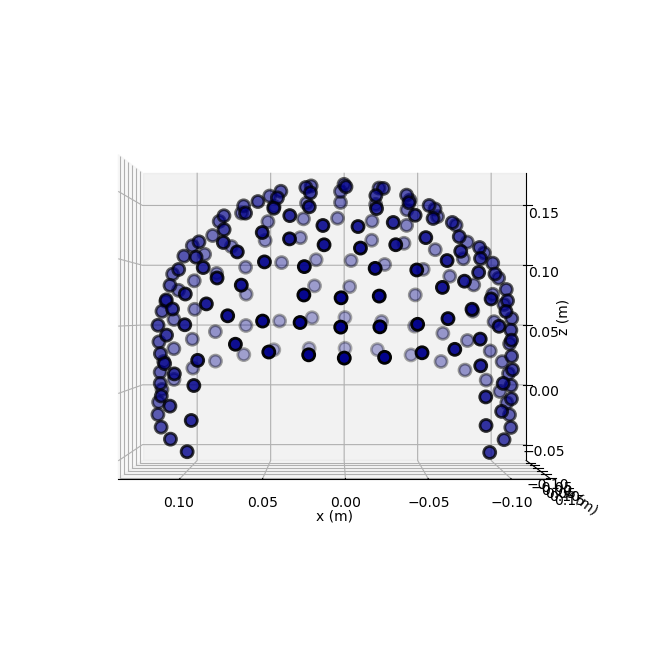

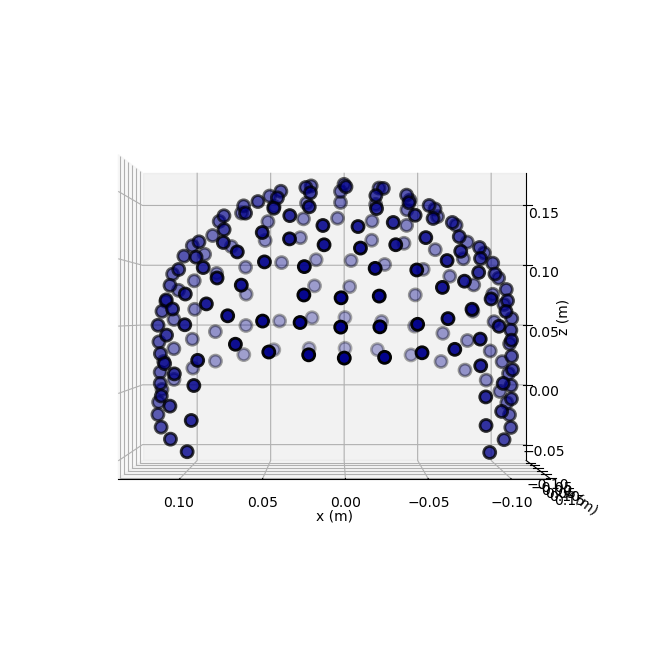

In [9]:
# Visualize the sensor locations
raw.plot_sensors(kind='3d')

In [10]:
# Mark channels as bad
# Identify channels with zero or infinite values in the PSD
channels_with_issues = ['MEG 053', 'MEG 067', 'MEG 102', 'MEG 137', 'MEG 154', 'MEG 181', 'MEG 182', 'MEG 183']

In [11]:
# Mark bad channels
raw.info['bads'] = channels_with_issues

In [12]:
# Remove bad channels
raw_concatenated_cleaned = raw.copy().drop_channels(raw.info['bads'])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.5s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.9s


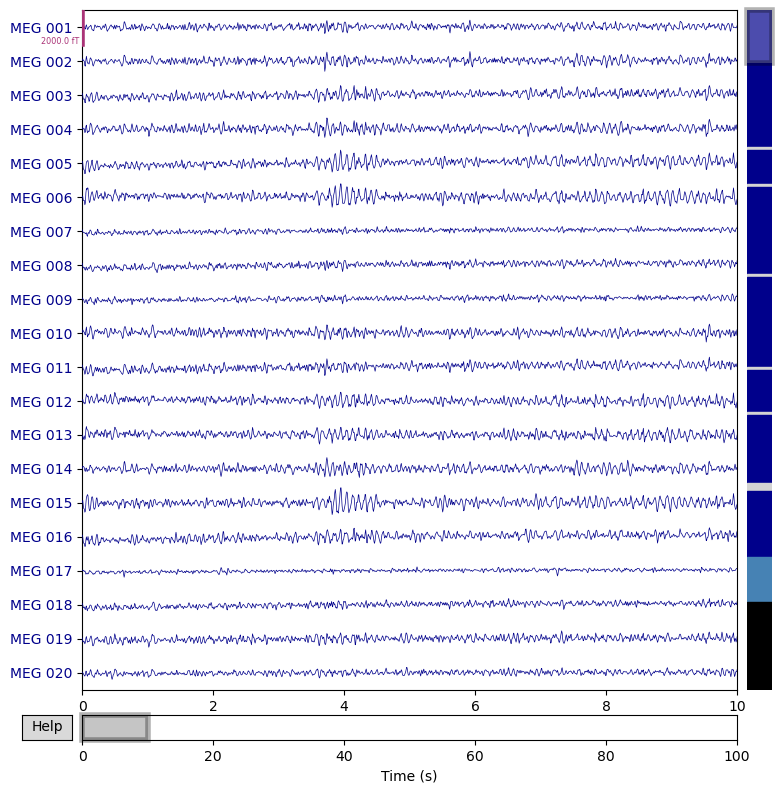

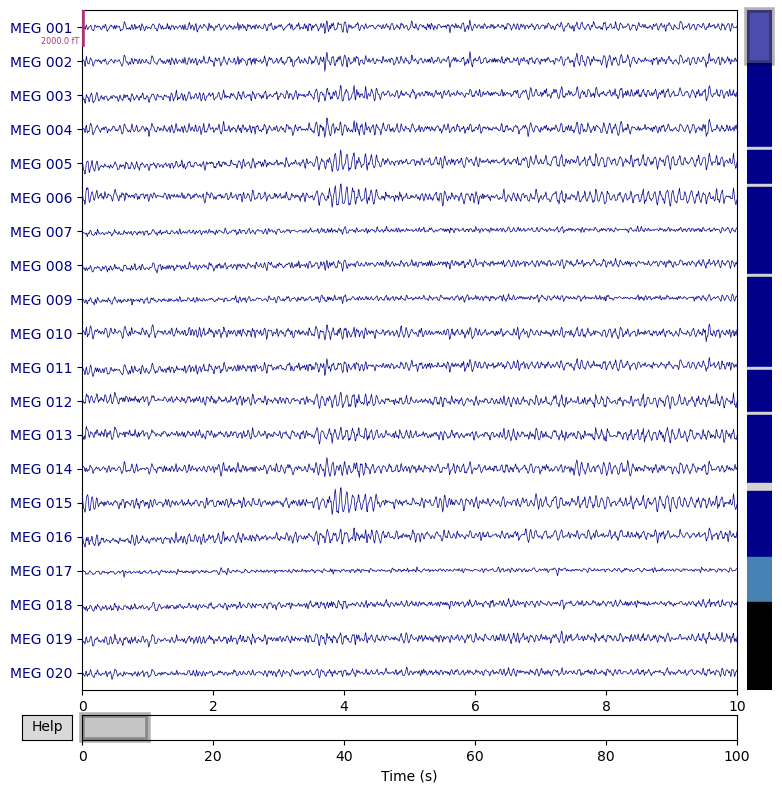

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\User\AppData\Local\Temp\ipykernel_16564\3498311699.py:13: RuntimeWarning: Estimated head radius (11.2 cm) is above the 99th percentile for adult head size.
  raw_cropped.plot_psd(ax=ax[0], show=False)
C:\Users\User\AppData\Local\Temp\ipykernel_16564\3498311699.py:13: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_cropped.plot_psd(ax=ax[0], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\User\AppData\Local\Temp\ipykernel_16564\3498311699.py:14: RuntimeWarning: Estimated head radius (11.2 cm) is above the 99th percentile for adult head size.
  raw_cropped_filtered.plot_psd(ax=ax[1], show=False)
C:\Users\User\AppData\Local\Temp\ipykernel_16564\3498311699.py:14: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_cropped_filtered.plot_psd(ax=ax[1], show=False)
C:\Users\User\anaconda3\envs\mne\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


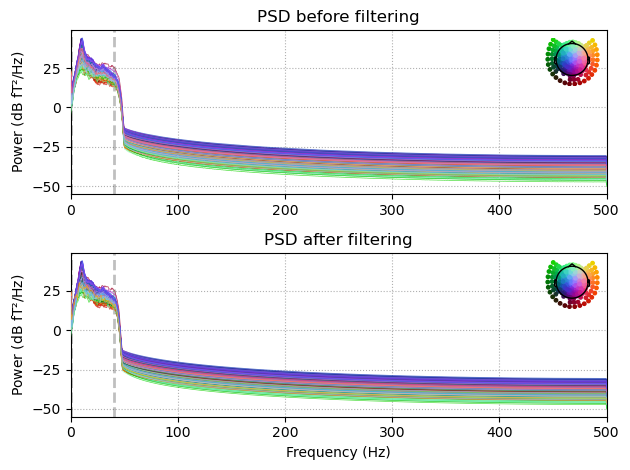

In [13]:
# Crop and filter the data
raw_cropped = raw.copy().crop(tmax=100)
raw_cropped.times[-1]
raw_cropped_filtered = raw_cropped.filter(l_freq=0.1, h_freq=40)
raw_cropped.load_data()
raw_cropped_filtered = raw_cropped.copy().filter(l_freq=0.1, h_freq=40)
raw_cropped.plot(events=events, event_id=event_id)
raw_cropped_filtered.plot(events=events, event_id=event_id)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_cropped.plot_psd(ax=ax[0], show=False)
raw_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()